In [ ]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load the data set from file
startup = pd.read_csv('50_Startups.csv')

# print out some of the data

In [ ]:
# show the first 5 values
startup.head()

In [ ]:
# divide the dataset
X = startup.iloc[:, :-1].values
y = startup.iloc[:, 4].values

# the independent variables (x)
think of it as the inputs

In [ ]:
# 0 R&D Spend
# 1 Administration
# 2Marketing Spend
# 3 State
pd.DataFrame(X).head()

# the dependent variables (y)
think of it as the output

In [ ]:
#profit
pd.DataFrame(y).head()

# playing around with the data - part 1

In [63]:
# count the 'states' by values
startup["State"].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [64]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [65]:
# a function here, that counts the procent of data that have '0', 'NaN' or 'empty'

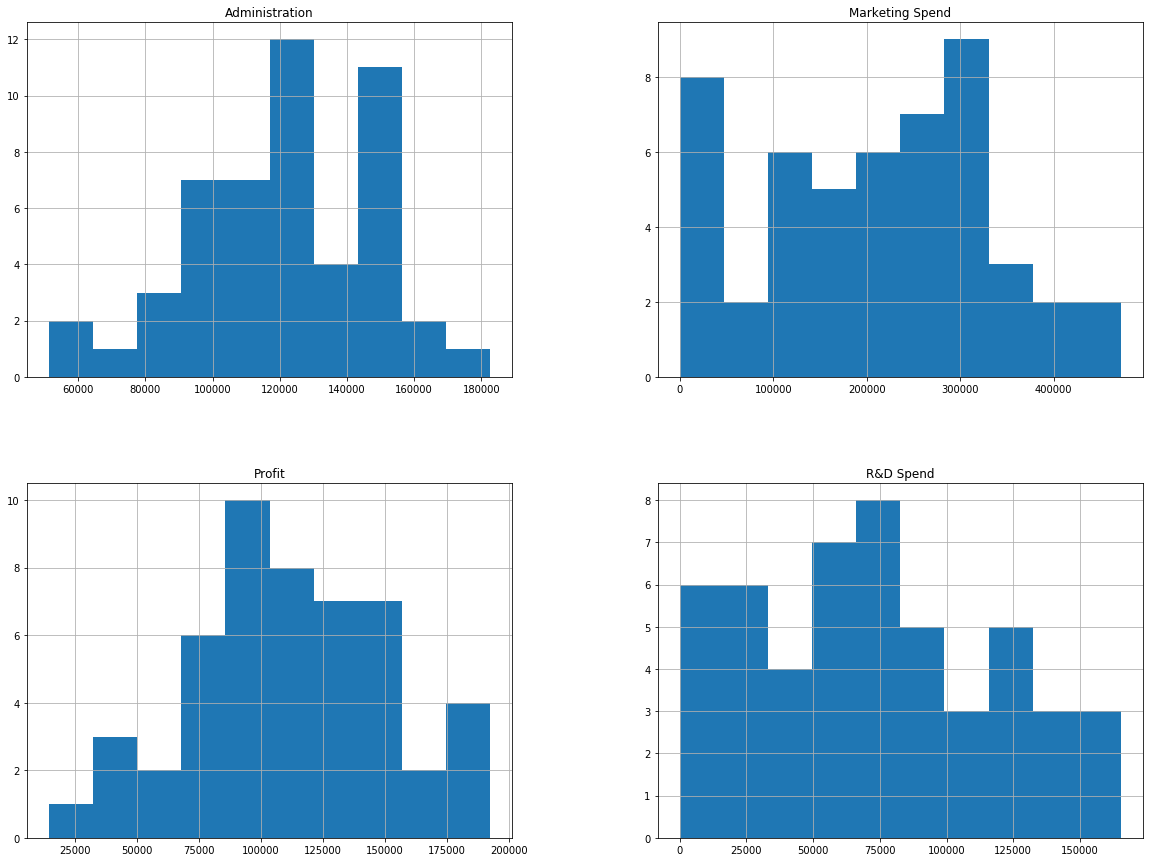

In [66]:
# let see some histogram of the dataset
%matplotlib inline
startup.hist(bins=10, figsize=(20,15))
#save_fig("attribute_histogram_plots") # this don't work
plt.show()

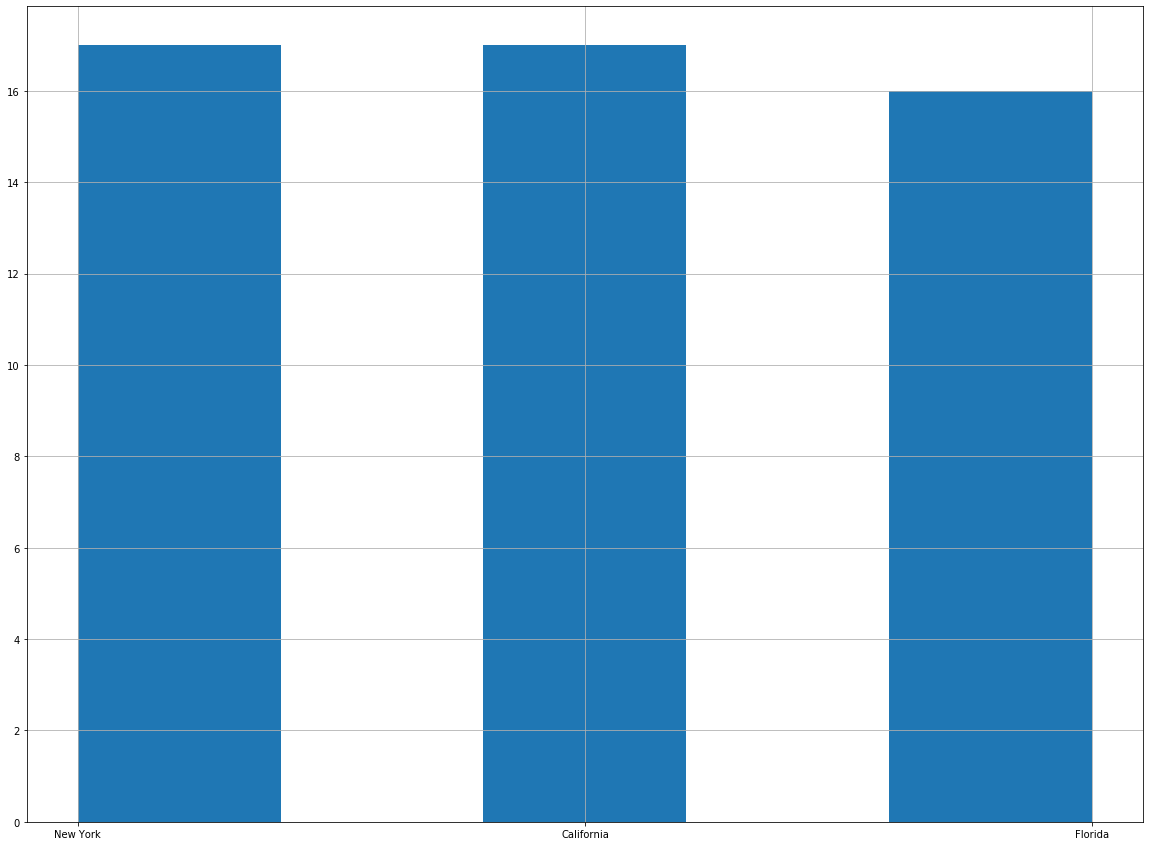

In [68]:
# let see histogram of 'State' (it's the same as calling .count() )
startup["State"].hist(bins=5, figsize=(20,15))

# training and test set

training and test - set 80/20

training (40) and test (10) 

In [12]:
# For illustration only. Sklearn has train_test_split()
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
# get the 'train_set' and the 'test_set'
train_set, test_set = split_train_test(startup, 0.2)
print(len(train_set))
print(len(test_set))

40
10


In [14]:
# the train set 
pd.DataFrame(train_set).head()

R&D Spend  Administration  Marketing Spend       State     Profit
4   142107.34        91391.77        366168.42     Florida  166187.94
48     542.05        51743.15             0.00    New York   35673.41
27   72107.60       127864.55        353183.81    New York  105008.31
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54

In [15]:
# the test set 
pd.DataFrame(test_set).head()

R&D Spend  Administration  Marketing Spend       State     Profit
45    1000.23       124153.04          1903.93    New York   64926.08
7   130298.13       145530.06        323876.68     Florida  155752.60
5   131876.90        99814.71        362861.36    New York  156991.12
8   120542.52       148718.95        311613.29    New York  152211.77
39   38558.51        82982.09        174999.30  California   81005.76

# playing around with the data - part 2

In [16]:
# here we divide each feature into each of their own variable
# we don't work with 'State' here
fx1 = train_set["R&D Spend"]
fx2 = train_set["Administration"]
fx3 = train_set["Marketing Spend"]
fy = train_set["Profit"]

## Stats about the features

In [17]:
# Marketing Spend
fx3.describe()

count        40.000000
mean     204222.073500
std      120304.091985
min           0.000000
25%      115395.745000
50%      212716.240000
75%      297501.962500
max      443898.530000
Name: Marketing Spend, dtype: float64

In [18]:
# Administration 
fx2.describe()

count        40.000000
mean     122687.322500
std       29043.040766
min       51283.140000
25%      107947.135000
50%      122699.795000
75%      145607.902500
max      182645.560000
Name: Administration, dtype: float64

In [19]:
# R&D Spend
fx1.describe()

count        40.000000
mean      71573.538000
std       43685.179053
min           0.000000
25%       45528.002500
50%       69820.065000
75%       94062.102500
max      162597.700000
Name: R&D Spend, dtype: float64

In [20]:
# profit
fy.describe()

count        40.000000
mean     109357.544750
std       39662.755586
min       14681.400000
25%       94846.917500
50%      106568.940000
75%      130588.442500
max      191792.060000
Name: Profit, dtype: float64

# find_ab() function

In [21]:
# this will be needed for making Linear Regression
def find_ab(x, y):
    n = len(x)
    
    xSum = sum(x)
    ySum = sum(y)
    xySum = np.dot(x,y)
    x2Sum = np.dot(x,x)
    
    a = ( (ySum * x2Sum) - (xSum * xySum) ) / ( (n * x2Sum) - (xSum)**2 )
    b = ( (n * xySum) - (xSum * ySum) ) / ( (n * x2Sum) - (xSum)**2 )
    
    return a, b

# Ploting the independent variables and use Linear Regression on them

a: 46220.902150922164 b: 0.8821227001392317
test_line: [46220.902150922164, 266751.5771857301]


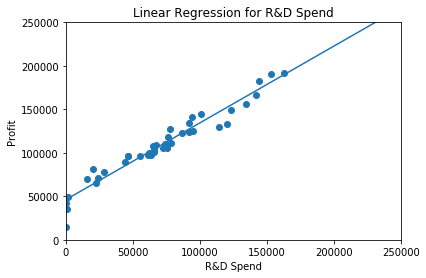

In [22]:
# the title and labels for the graf
plt.title('Linear Regression for R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel("Profit")

# set the the bottom and top for x and y axis
plt.axis([0,250000,
          0,250000])

plt.scatter(fx1,fy)

# get the 'a' and 'b' for the Linear Regression graf-function
a, b = find_ab(fx1, fy)
print("a:",a,"b:",b)

test_line = [b * item + a for item in [0, 250000]]
print("test_line:", test_line)

# this will print the line on top of the scatter points
plt.plot([0, 250000], test_line)

a: 83576.86154819936 b: 0.2101332287351886
test_line: [83576.86154819936, 136110.1687319965]


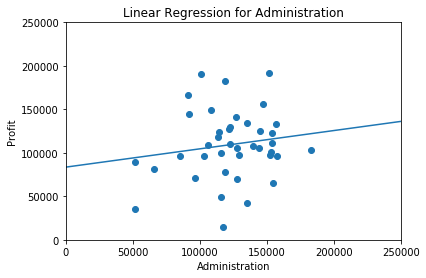

In [23]:
# the title and labels for the graf
plt.title('Linear Regression for Administration')
plt.xlabel('Administration')
plt.ylabel("Profit")

# set the the bottom and top for x and y axis
plt.axis([0,250000,
          0,250000])

plt.scatter(fx2,fy)

# get the 'a' and 'b' for the Linear Regression graf-function
a, b = find_ab(fx2, fy)
print("a:",a,"b:",b)

test_line = [b * item + a for item in [0, 250000]]
print("test_line:", test_line)

# this will print the line on top of the scatter points
plt.plot([0, 250000], test_line)

### as we can see, administration is the only one that don't work great with linear regression

a: 62497.72522992012 b: 0.22945521371410338
test_line: [62497.72522992012, 177225.33208697182]


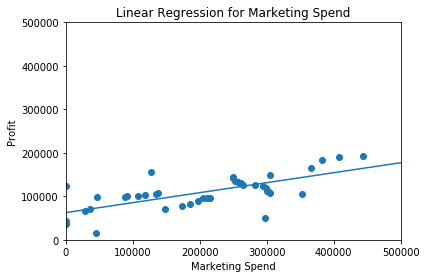

In [24]:
# the title and labels for the graf
plt.title('Linear Regression for Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel("Profit")

# set the the bottom and top for x and y axis
plt.axis([0,500000,
          0,500000])
plt.scatter(fx3,fy)

# get the 'a' and 'b' for the Linear Regression graf-function
a, b = find_ab(fx3, fy)
print("a:",a,"b:",b)

test_line = [b * item + a for item in [0, 500000]]
print("test_line:", test_line)

# this will print the line on top of the scatter points
plt.plot([0, 500000], test_line)

# Prepare the data for Machine Learning algorithms

In [25]:
# we can't use the X or Y we made at the start of this program
# since those don't follow the random order that 'train_set' and 'test_set' does

temp = train_set 

# we will edit newY soon
newY = temp

temp = temp.drop("Profit", axis=1)  
newX = temp.drop("State", axis=1)

newX.head()

R&D Spend  Administration  Marketing Spend
4   142107.34        91391.77        366168.42
48     542.05        51743.15             0.00
27   72107.60       127864.55        353183.81
25   64664.71       139553.16        137962.62
26   75328.87       144135.98        134050.07

In [26]:
# here we drop everything that is not'Profit' from the dataset
newY = newY.drop("R&D Spend", axis=1)
newY = newY.drop("Administration", axis=1)
newY = newY.drop("Marketing Spend", axis=1)
newY = newY.drop("State", axis=1)

newY.head()

Profit
4   166187.94
48   35673.41
27  105008.31
25  107404.34
26  105733.54

# transform and imput

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [28]:
# we still have all the 0 values
newX

R&D Spend  Administration  Marketing Spend
4   142107.34        91391.77        366168.42
48     542.05        51743.15             0.00
27   72107.60       127864.55        353183.81
25   64664.71       139553.16        137962.62
26   75328.87       144135.98        134050.07
1   162597.70       151377.59        443898.53
37   44069.95        51283.14        197029.42
46    1315.46       115816.21        297114.46
17   94657.16       145077.58        282574.31
21   78389.47       153773.43        299737.29
44   22177.74       154806.14         28334.72
13   91992.39       135495.07        252664.93
6   134615.46       147198.87        127716.82
22   73994.56       122782.75        303319.26
23   67532.53       105751.03        304768.73
15  114523.61       122616.84        261776.23
35   46014.02        85047.44        205517.64
14  119943.24       156547.42        256512.92
16   78013.11       121597.55        264346.06
9   123334.88       108679.17        304981.62
29   65605.48       153032.06        107138.38
40   28754.33       118546.05        172795.67
30   61994.48       115641.28         91131.24
19   86419.70       153514.11             0.00
43   15505.73       127382.30         35534.17
42   23640.93        96189.63        148001.11
38   20229.59        65947.93        185265.10
28   66051.52       182645.56        118148.20
34   46426.07       157693.92        210797.67
3   144372.41       118671.85        383199.62
31   61136.38       152701.92         88218.23
2   153441.51       101145.55        407934.54
20   76253.86       113867.30        298664.47
33   55493.95       103057.49        214634.81
11  100671.96        91790.61        249744.55
18   91749.16       114175.79        294919.57
12   93863.75       127320.38        249839.44
47       0.00       135426.92             0.00
32   63408.86       129219.61         46085.25
49       0.00       116983.80         45173.06

In [29]:
# we need to call 'fit()' on the 'imputer' for it to be able to handle the data
imputer.fit(newX)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [30]:
# lets look at the median from each feature
imputer.statistics_

array([ 69820.065, 122699.795, 212716.24 ])

In [31]:
# just checking if the median are right
newX.median().values

array([ 69820.065, 122699.795, 212716.24 ])

In [32]:
# here we strip all other data from the dataset, which we don't need
# leaving us with just an array
# this works, since we dropped the 'state' from the dataset (newX)

newX_converted = imputer.transform(newX)
print(newX_converted[:5])

[[142107.34  91391.77 366168.42]
 [   542.05  51743.15      0.  ]
 [ 72107.6  127864.55 353183.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]]


In [33]:
# and just to show how you can do it, we turn it back into a dataset 
newX_dataset = pd.DataFrame(newX_converted, columns=newX.columns, index=newX.index)
newX_dataset.head()

R&D Spend  Administration  Marketing Spend
4   142107.34        91391.77        366168.42
48     542.05        51743.15             0.00
27   72107.60       127864.55        353183.81
25   64664.71       139553.16        137962.62
26   75328.87       144135.98        134050.07

In [34]:
# convert the y dataframe to an array
imputer.fit(newY)
newY_converted = imputer.transform(newY)
print(newY_converted[:5])

[[166187.94]
 [ 35673.41]
 [105008.31]
 [107404.34]
 [105733.54]]


In [35]:
imputer.strategy

'median'

# make the model

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(newX_converted, newY_converted)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
some_profit = newY_converted[:5]
some_data_prepared = newX_converted[:5]

In [38]:
outcomeY = lin_reg.predict(newX_converted)
print("Predictions:")
print(list(outcomeY[:5]))

Predictions:
[array([174181.87546923]), array([47189.45174461]), array([113626.18819602]), array([101073.61376022]), array([109721.10991363])]


In [39]:
print("real profit:")
print(list(some_profit))

real profit:
[array([166187.94]), array([35673.41]), array([105008.31]), array([107404.34]), array([105733.54])]


In [40]:
from sklearn.metrics import mean_squared_error

profit_predictions = lin_reg.predict(newX_converted)
lin_mse = mean_squared_error(newY_converted, profit_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8767.396277783258

In [41]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(newY_converted, profit_predictions)
lin_mae

6518.288383339854

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(newX_converted, newY_converted)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [43]:
profit_predictions = tree_reg.predict(newX_converted)
tree_mse = mean_squared_error(newY_converted, profit_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

# playing around with a random x feature and the predictions for the 'profit' (we know it is wrong)

a: [62497.72522992] b: [0.22945521]
[array([62497.72522992]), array([177225.33208697])]


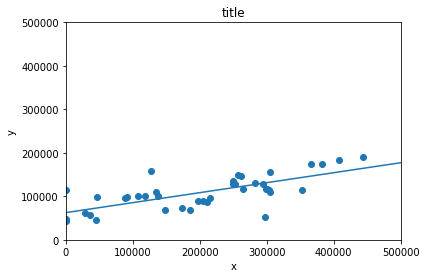

In [44]:
# write names on the graf
plt.title('title')
plt.xlabel('x')
plt.ylabel("y")

# set the the bottom and top for x and y 
#plt.axis([0,250000,0,250000])
#plt.scatter(fx1,outcomeY)

plt.axis([0,500000,0,500000])
plt.scatter(newX_dataset["Marketing Spend"],outcomeY)

a, b = find_ab(newX_dataset["Marketing Spend"], outcomeY)
print("a:",a,"b:",b)

test_line = [b * item + a for item in [0, 500000]]
print(test_line)

plt.plot([0, 500000], test_line)

# Fine-tune your model

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, newX_converted, newY_converted,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [11457.6961431  21126.59217394  7511.42066742  9183.43393427
 14560.33846959  4300.15316936 21838.32747948  8365.36039816
 13662.10174511 13451.48564976]
Mean: 12545.690983019882
Standard deviation: 5379.6564968983885


In [47]:
lin_scores = cross_val_score(lin_reg, newX_converted, newY_converted,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [10840.40137044  3282.31144084  5334.56465674  9849.19910767
 12100.98211265  5990.07400627 11316.28283322  8360.21365784
  5011.81194985 18573.42157314]
Mean: 9065.926270866983
Standard deviation: 4268.470617567315


Note: we specify n_estimators=100 to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).

In [48]:
# this one give warnings, but it still runs and give an output

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(newX_converted, newY_converted)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [49]:
profit_predictions = forest_reg.predict(newX_converted)
forest_mse = mean_squared_error(newY_converted, profit_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3419.224734379333

In [50]:
# this one give warnings, but it still runs and give an output

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, newX_converted, newY_converted,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [ 9400.7075335  11227.21338292  6654.32967089  4988.68155589
  8846.15853783  6544.83196616 13315.30468914 13449.76717137
  5199.61605882 19626.75526534]
Mean: 9925.336583186052
Standard deviation: 4358.853728798344


In [51]:
scores = cross_val_score(lin_reg, newX_converted, newY, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean      9065.926271
std       4499.363092
min       3282.311441
25%       5498.441994
50%       9104.706383
75%      11197.312468
max      18573.421573
dtype: float64

In [52]:
# this one give warnings, but it still runs and give an output

from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(newX_converted, newY)
housing_predictions = svm_reg.predict(newX_converted)
svm_mse = mean_squared_error(newY, profit_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


3419.224734379333

# everything under this line, is not something we need to do (also it don't work)

The best hyperparameter combination found:

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 
     'max_features': [2, 4, 6, 8]},
    
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 
     'n_estimators': [3, 10, 30], 
     'max_features': [0,3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(newX_converted, newY_converted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [54]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 3, 'n_estimators': 3}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=3, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

18864.456857335055 {'max_features': 2, 'n_estimators': 3}
13674.613452787462 {'max_features': 2, 'n_estimators': 10}
12742.87598239113 {'max_features': 2, 'n_estimators': 30}
nan {'max_features': 4, 'n_estimators': 3}
nan {'max_features': 4, 'n_estimators': 10}
nan {'max_features': 4, 'n_estimators': 30}
nan {'max_features': 6, 'n_estimators': 3}
nan {'max_features': 6, 'n_estimators': 10}
nan {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 3}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
nan {'bootstrap': False, 'max_features': 0, 'n_estimators': 3}
nan {'bootstrap': False, 'max_features': 0, 'n_estimators': 10}
nan {'bootstrap': False, 'max_features': 0, 'n_estimators': 30}
12320.555675004574 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
12359.702082935419 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
12484.734700021017 {'bootstrap': False, 'max_features': 3, 'n_estimators': 30}
nan {

In [57]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.004995  1.038148e-06         0.000599    4.893565e-04   
1        0.010389  7.990360e-04         0.000998    4.623108e-07   
2        0.029769  1.325267e-03         0.001798    3.999712e-04   
3        0.001798  3.995896e-04         0.000000    0.000000e+00   
4        0.004395  4.879569e-04         0.000000    0.000000e+00   
5        0.009990  3.234067e-07         0.000000    0.000000e+00   
6        0.001998  6.641573e-07         0.000000    0.000000e+00   
7        0.003996  1.472802e-06         0.000000    0.000000e+00   
8        0.010190  3.982613e-04         0.000000    0.000000e+00   
9        0.001997  9.887906e-07         0.000000    0.000000e+00   
10       0.004795  1.164748e-03         0.000000    0.000000e+00   
11       0.010496  4.479713e-04         0.000000    0.000000e+00   
12       0.001798  3.996373e-04         0.000000    0.000000e+00   
13       0.003796  3.995657e-04         0.000000    0.000000e+00   
14       0.010190  3.995419e-04         0.000000    0.000000e+00   
15       0.002597  4.893369e-04         0.000600    4.896682e-04   
16       0.007792  3.995422e-04         0.000999    2.780415e-07   
17       0.020579  7.987501e-04         0.002047    9.648851e-05   
18       0.001598  4.896872e-04         0.000000    0.000000e+00   
19       0.004195  3.997327e-04         0.000000    0.000000e+00   
20       0.010190  3.988982e-04         0.000000    0.000000e+00   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  0                  3           False   
13                  0                 10           False   
14                  0                 30           False   
15                  3                  3           False   
16                  3                 10           False   
17                  3                 30           False   
18                  4                  3           False   
19                  4                 10           False   
20                  4                 30           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -2.721107e+08   
1             {'max_features': 2, 'n_estimators': 10}      -1.563858e+08   
2             {'max_features': 2, 'n_estimators': 30}      -1.510608e+08   
3              {'max_features': 4, 'n_estimators': 3}                NaN   
4             {'max_features': 4, 'n_estimators': 10}                NaN   
5             {'max_features': 4, 'n_estimators': 30}                NaN   
6              {'max_features': 6, 'n_estimators': 3}                NaN   
7             {'max_features': 6, 'n_estimators': 10}                NaN   
8             {'max_features': 6, 'n_estimators': 30}                NaN   
9              {'max_features': 8, 'n_estimators': 3}                NaN   
10            {'max_features': 8, 'n_estimators': 10}                NaN   
11            {'max_features': 8, 'n_estimators': 30}                NaN   
12  {'bootstrap': False, 'max_features': 0, 'n_est...                NaN   
13  {'bootstrap': False, 'max_features': 0, 'n_est...                NaN   
14  {'bootstrap': False, 'max_features': 0, 'n

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(newX_converted, newY_converted)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [59]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'max_features': 7, 'n_estimators': 180}
nan {'max_features': 5, 'n_estimators': 15}
11068.842491888809 {'max_features': 3, 'n_estimators': 72}
nan {'max_features': 5, 'n_estimators': 21}
nan {'max_features': 7, 'n_estimators': 122}
11093.309310134424 {'max_features': 3, 'n_estimators': 75}
11116.178137627898 {'max_features': 3, 'n_estimators': 88}
nan {'max_features': 5, 'n_estimators': 100}
10843.788992901551 {'max_features': 3, 'n_estimators': 150}
nan {'max_features': 5, 'n_estimators': 2}


In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.97769653, 0.00665602, 0.01564745])

In [61]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
#cat_encoder = full_pipeline.named_transformers_["cat"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
#attributes = num_attribs + extra_attribs + cat_one_hot_attribs
#sorted(zip(feature_importances, attributes), reverse=True)

# the important part

In [62]:
final_model = grid_search.best_estimator_

X_test = test_set
X_test = X_test.drop("State", axis=1)
X_test = X_test.drop("Profit", axis=1)

imputer.fit(X_test)
X_test = imputer.transform(X_test)

y_test = test_set["Profit"].copy()

print(y_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

45     64926.08
7     155752.60
5     156991.12
8     152211.77
39     81005.76
41     77798.83
0     192261.83
24    108552.04
36     90708.19
10    146121.95
Name: Profit, dtype: float64


NameError: name 'X_test_prepared' is not defined